# Bonus: Temperature Analysis I

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt


In [4]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [5]:
# Convert the date column format from string to datetime
df["date"]= pd.to_datetime(df['date'], format='%Y-%m-%d')

In [6]:
# Set the date column as the DataFrame index
# Drop the date column
df.set_index(["date"], drop=True,inplace=True)

### Compare June and December data across all years 

In [7]:
from scipy import stats

In [106]:
# Filter data for desired months
df_June=df.loc[df.index.get_level_values(0).month==6]
df_Dec=df.loc[df.index.get_level_values(0).month==12]

#Find the min sample to compare
maxlength=min(len(df_June), len(df_Dec))

In [107]:
# Identify the average temperature for June
#Randomly selected  to 1517 samples to match with Dec 
df_June=df_June.sample(n = maxlength)
df_Dec=df_Dec.sample(n = maxlength)
df_June["tobs"].mean()
df_June.tobs.describe()

count    1517.000000
mean       74.955175
std         3.255901
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [108]:
# Identify the average temperature for December
df_Dec["tobs"].describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

In [78]:
# Create collections of temperature data
data1=df_June.tobs 
data2=df_Dec.tobs



In [81]:
# Run paired t-test
stats.ttest_rel(data1,data2)


Ttest_relResult(statistic=34.77789847720191, pvalue=2.631389938287707e-195)

In [110]:
#Run independent t=test
stats.ttest_ind(data1,data2, equal_var=False)

Ttest_indResult(statistic=33.85524406121801, pvalue=1.5645995775107797e-212)

In [88]:
stats.levene(data1, data2)

LeveneResult(statistic=20.92320118930869, pvalue=4.972494594633744e-06)

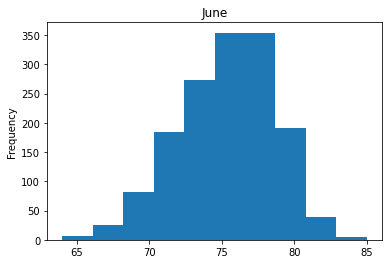

In [94]:
data1.plot(kind="hist", title="June")
plt.savefig('June')

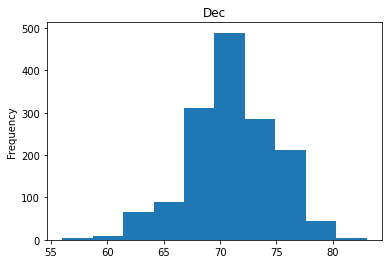

In [95]:
data2.plot(kind="hist", title="Dec")
plt.savefig('Dec')

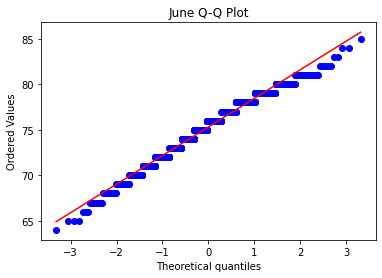

In [96]:
stats.probplot(data1, dist="norm", plot= plt)
plt.title("June Q-Q Plot")
plt.savefig("June.png")

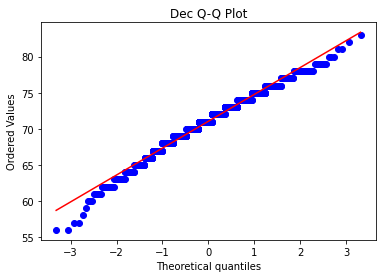

In [97]:
stats.probplot(data2, dist="norm", plot= plt)
plt.title("Dec Q-Q Plot")
plt.savefig("Dec.png")

In [98]:
stats.shapiro(data1)

ShapiroResult(statistic=0.9808489084243774, pvalue=2.471445086343199e-13)

In [99]:
stats.shapiro(data2)

ShapiroResult(statistic=0.9842931032180786, pvalue=8.615877976347885e-12)

### Analysis

The purpose of the current study was to test if there is a significant difference in the tempearature between June and Dec for Hawaii. June average Temp (M=74.95, SD=3.255) is higher and has lower variation than Dec temp (M= 71.041529, SD= 3.745920). Levene’s test for homogeneity of variances indicated inequality of variance (statistic=20.92320118930869, pvalue=4.972494594633744e-06), therefore a paired t-test was used. Paired tt test reports a very small pvalue (t(1517*2 -2)=34.77789847720191, pvalue=2.631389938287707e-195). This implies the null hypothesis is not true. Null hypothesis  assumes that the true mean difference between paired samples is zero. Conversely the alternate hypothesis assumes the true mean difference between paired samples is not zero. So the June and Dec months have statistically different samples. 